In [15]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd
import sys
import networkx as nx
import os
import warnings
# matplotlib and seaborn for plotting

import matplotlib.pyplot as plt
import seaborn as sns

import os

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
ROOT_PACKAGE_DIRECTORY = '/Users/bede01/Documents/work/phd-papers/ml-workload-optimization/code/jupyter'
ROOT_DATA_DIRECTORY = ROOT_PACKAGE_DIRECTORY + '/data'
GRAPH_DATABASE_PATH = ROOT_PACKAGE_DIRECTORY + '/data/graph/exp-reuse-same-workload.graph'
sys.path.append(ROOT_PACKAGE_DIRECTORY)

# Experiment Graph
from experiment_graph.execution_environment import ExecutionEnvironment


# Suppress warnings
warnings.filterwarnings('ignore')
% matplotlib inline


try:
    import pygraphviz
    from networkx.drawing.nx_agraph import graphviz_layout
except ImportError:
    try:
        import pydot
        from networkx.drawing.nx_pydot import graphviz_layout
    except ImportError:
        raise ImportError("This example needs Graphviz and either "
                          "PyGraphviz or pydot")

In [16]:
import os
import sys
import warnings
import hashlib

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from importlib import import_module


In [17]:
execution_environment = ExecutionEnvironment()
execution_environment.load_environment(root_data + '/experiment_graphs/home-credit-default-risk/environment_dedup')

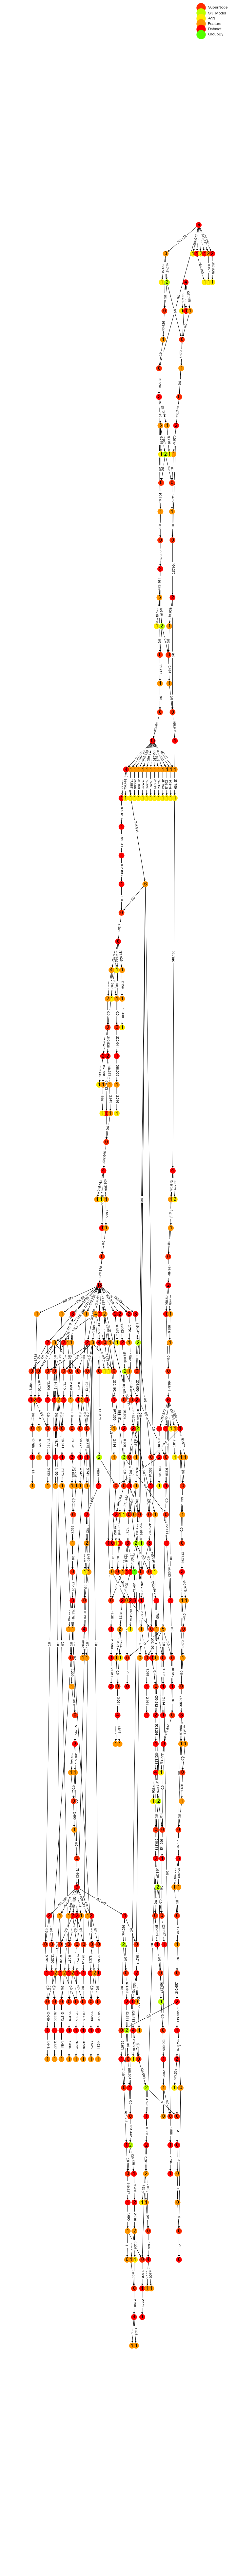

In [20]:
execution_environment.graph.plot_graph(plt, figsize=(12,144), edge_oper=False, edge_time=True)

In [23]:
graph = execution_environment.graph.graph

In [ ]:
def plot_graph(plt,graph, figsize=(12, 12), vertex_freq=True, edge_oper=False, edge_time=False):
    """
    plot the graph using the graphvix dot layout
    :param figsize: size of the figure (default (12,12))
    :param plt: matlibplot object
    :param vertex_freq: boolean flag for hiding vertex frequencies (default True)
    :param edge_oper: boolean flag for hiding operation names on the edges (default False)
    :param edge_time: boolean flag for hiding operation execution time on edges (default Flase)
    """
    from networkx.drawing.nx_agraph import graphviz_layout
    f = plt.figure(figsize=figsize)
    ax = f.add_subplot(1, 1, 1)
    pos = graphviz_layout(graph, prog='dot', args='')
    # TODO we should find a way to automatically update the frequencies currently, they are updated
    # TODO inside the Node subclasses and there is no direct access to the graph from inside the
    # TODO Node subclasses, that's why we are manually calling this function to compute teh actual
    # TODO frequencies
    compute_frequencies()
    # get the list of available types and frequency of each node
    freqs = {}
    unique_types = []
    for node in self.graph.nodes(data=True):
        if node[1]['type'] not in unique_types:
            unique_types.append(node[1]['type'])
        freqs[node[0]] = node[1]['freq']

    jet = plt.get_cmap('prism')
    colors = jet(np.linspace(0, 1, len(unique_types)))
    color_map = dict(zip(unique_types, colors))
    for label in color_map:
        ax.scatter(None, None, color=color_map[label], label=label)

    all_colors = [color_map[n[1]['type']] for n in self.graph.nodes(data=True)]
    nx.draw_networkx(
        self.graph,
        cmap=jet,
        vmin=0,
        vmax=len(unique_types),
        node_color=all_colors,
        pos=pos,
        with_labels=False,
        ax=ax)

    if vertex_freq:
        nx.draw_networkx_labels(self.graph,
                                pos=pos,
                                labels=freqs,
                                font_size=14)

    def construct_label(edge_data, oper, ti):
        if oper and ti:
            return edge_data['name'], edge_data['execution_time']
        if oper:
            return edge_data['name']
        if ti:
            return edge_data['execution_time']
        return ''

    nx.draw_networkx_edge_labels(
        self.graph,
        pos=pos,
        edge_labels={(u, v): construct_label(d, edge_oper, edge_time)
                     for u, v, d in self.graph.edges(data=True)})

    plt.axis('off')
    f.set_facecolor('w')
    leg = ax.legend(markerscale=4, loc='best', fontsize=12, scatterpoints=1)

    for line in leg.get_lines():
        line.set_linewidth(4.0)